In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [53]:
doc = pd.read_csv('data_YesBank_StockPrices.csv')
doc.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [54]:
#Check for NA data

doc.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [58]:
# The data is in the form mm-yy which is not significant to the model, so we will split it into two columns
doc['Date'] = pd.to_datetime(doc['Date'], format='%b-%y')
doc['Year'] = doc['Date'].dt.year
doc['Month'] = doc['Date'].dt.month
doc.drop(columns=['Date'], inplace=True)
doc

,Open,High,Low,Close,Year,Month
0,13.00,14.00,11.25,12.46,2005,7
1,12.58,14.88,12.55,13.42,2005,8
2,13.48,14.87,12.27,13.30,2005,9
3,13.20,14.47,12.40,12.99,2005,10
4,13.35,13.88,12.88,13.41,2005,11
...,...,...,...,...,...,...
180,25.60,28.30,11.10,11.95,2020,7
181,12.00,17.16,11.85,14.37,2020,8
182,14.30,15.34,12.75,13.15,2020,9
183,13.30,14.01,12.11,12.42,2020,10


In [64]:
# Since all our data is numerical, we can don't need to one-hot encode any categorical variables.
# Splitting the data

target = 'Close'
Categorical = ['Open', 'High', 'Low', 'Month', 'Year']

x = doc[Categorical]
y = doc[target]

ind = len(x)*0.8
x_train, x_test = x[:int(ind)], x[int(ind):]
y_train, y_test = y[:int(ind)], y[int(ind):]



## Model 1: Linear Regressor

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [100]:
model.score(x_test, y_test)

0.9843415188364839

In [103]:
# Analysing the output

pred = model.predict(x_test)
print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))


MAE: 10.608732187763414
MSE: 257.09624573654276


## Model 2: Using Ridge

In [104]:
from sklearn.linear_model import Ridge
model2 = Ridge(alpha=0.5)
model2.fit(x_train, y_train)
model2.score(x_test, y_test)

0.9843420103966696

In [105]:
# Analysing the output

pred = model2.predict(x_test)
print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))


MAE: 10.608466593056864
MSE: 257.08817482104666


## Model 3: Using RandomForestRegressor

In [68]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_estimators=100, random_state=42)
model3.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [69]:
model3.score(x_test, y_test)

0.9661758869409532

In [106]:
# Analysing the output

pred = model3.predict(x_test)
print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))


MAE: 14.961464864864828
MSE: 555.3573422632406


## Model 4: Using SVR

In [78]:
from sklearn.svm import SVR
model4 = SVR(kernel='linear')
model4.fit(x_train, y_train)


SVR(kernel='linear')

In [79]:
model4.score(x_test, y_test)

0.9848740067005888

In [107]:
# Analysing the output

pred = model4.predict(x_test)
print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))


MAE: 9.143842830776094
MSE: 248.35333961863608


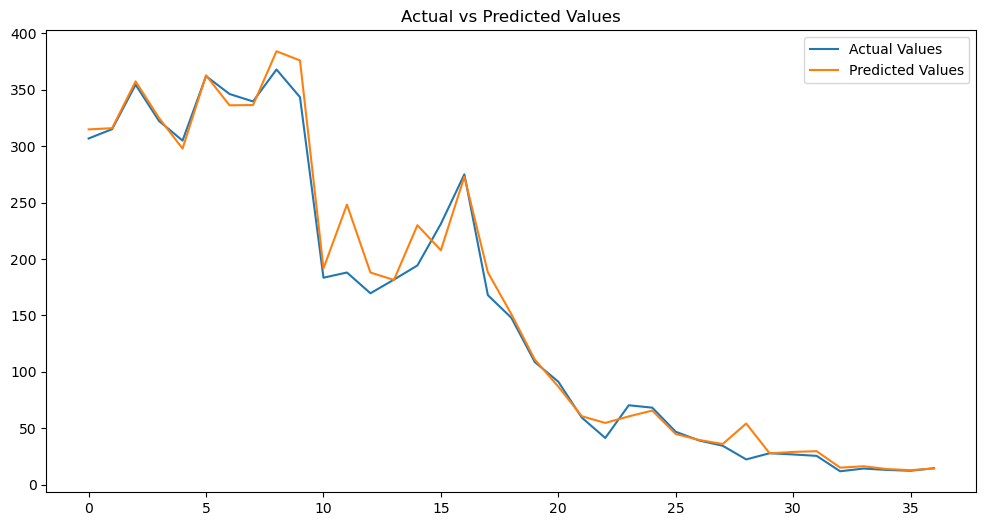

In [113]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Values')
plt.plot(pred, label='Predicted Values')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()

## Using XG Boost

In [98]:
model5 = XGBRegressor(n_estimators=20, learning_rate=0.03,random_state=42)

In [99]:
model5.fit(x_train, y_train)
model5.score(x_test, y_test)

0.5258082304719363